In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
sns.set()

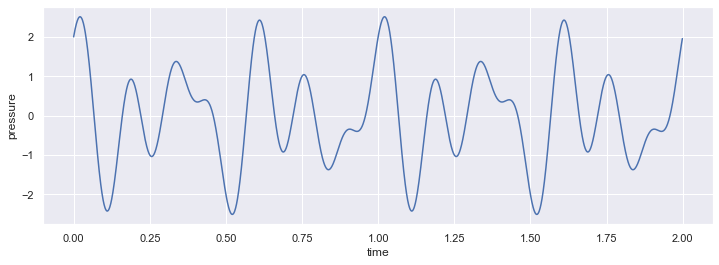

In [39]:
#input signal

f = 5.00 #frequency set as you wish
f_ = 3.00
f__ = 7.00
time = np.arange(0, 2, 0.001) #time points

cos_wave = np.cos(2*np.pi*f*time) + np.cos(2*np.pi*f_*time) + np.sin(2*np.pi*f__*time)

plt.plot(time, cos_wave)
plt.xlabel('time')
plt.ylabel('pressure')
plt.show()

In [40]:
r_cord_euler = []   #each samplefrequency (amplitude, theta) for all time points 

samplef_min = 0.0
samplef_max = 10.0
samplef = np.arange(samplef_min, samplef_max, 0.1)

for sf in samplef:
    r_cord_euler.append([(cos_wave[i], 2*np.pi*sf*time[i]) for i in range(len(time)) ])


In [41]:
x_cord, y_cord = [], []

for data in r_cord_euler:
    x_cord.append([Amp*np.cos(theta) for (Amp,theta) in data])
    y_cord.append([Amp*np.sin(theta) for (Amp,theta) in data])

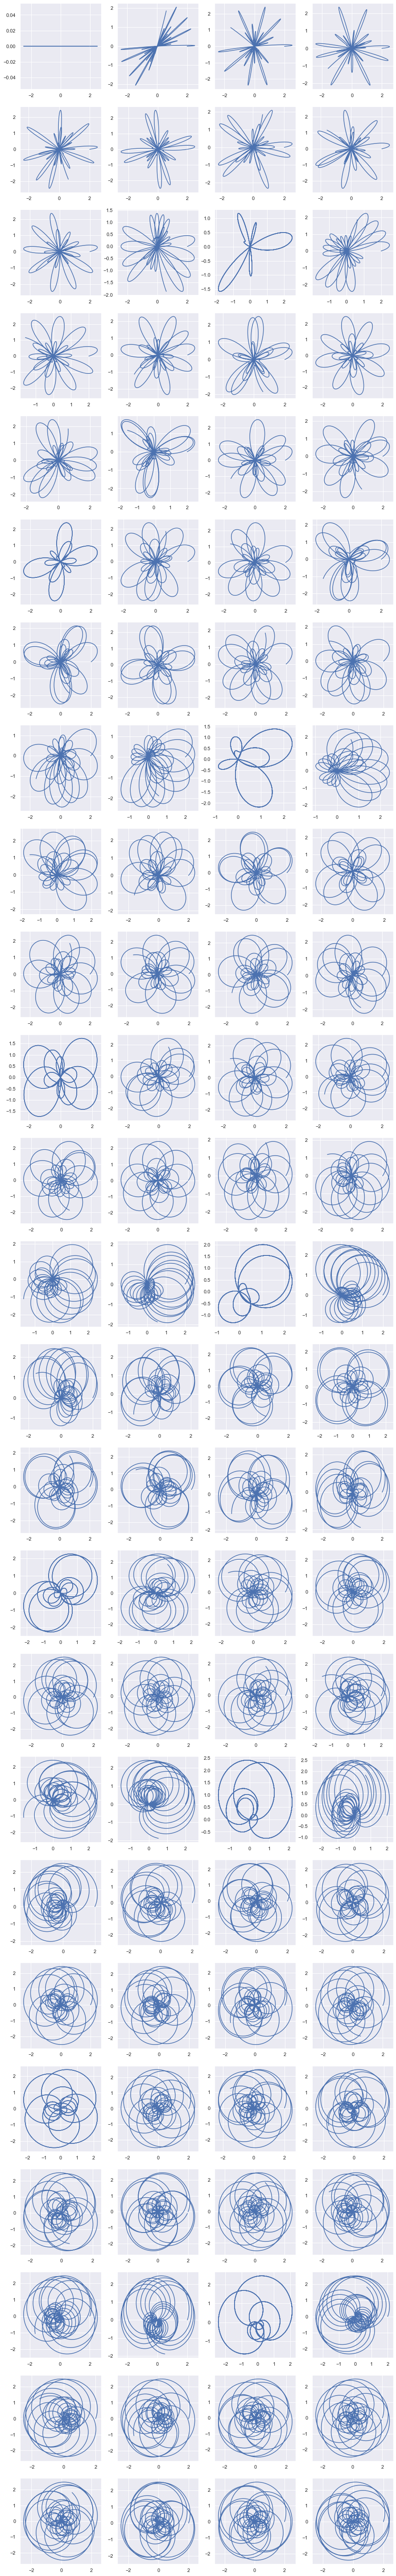

In [42]:
plt.rcParams["figure.figsize"] = (15,110)

x_means = []
for i in range(len(r_cord_euler)):
    plt.subplot(int(len(r_cord_euler)/4)+1, 4, int(i+1))
    
    plt.plot(x_cord[i], y_cord[i])
    
    sum_ = np.sum(x_cord[i]) 
    x_means.append(sum_) #scaled points in time

Text(0, 0.5, 'scaled x average')

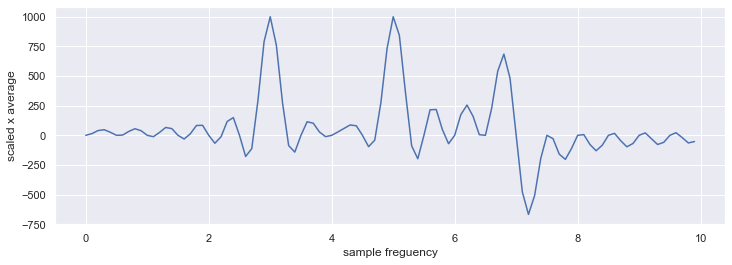

In [43]:
plt.rcParams['figure.figsize'] = (12,4)
plt.plot(samplef, x_means)
plt.xlabel('sample freguency')
plt.ylabel('scaled x average')

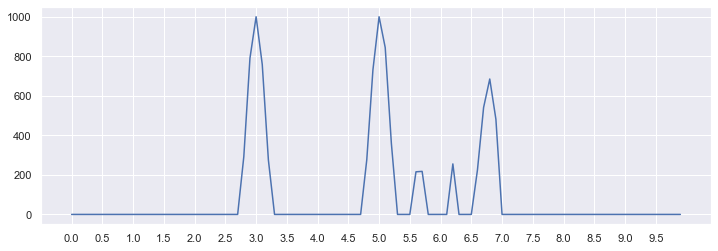

In [48]:
plt.rcParams['figure.figsize'] = (12, 4)
smoothened = [i if i > 0.2*(max(x_means)) else 0 for i in x_means]
plt.plot(samplef, smoothened)
plt.xticks(np.arange(min(samplef), max(samplef), 0.5))
plt.show()

<BarContainer object of 100 artists>

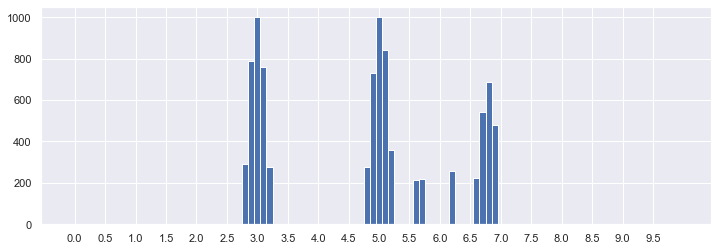

In [49]:
plt.rcParams['figure.figsize'] = (12, 4)
plt.xticks(np.arange(min(samplef), max(samplef), 0.5))
plt.bar(samplef, smoothened, 0.1)